In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['text.usetex'] = True

# Q1: Predicting `ckd_code_sample_1`
$y$=  `ckd_code_sample_1`
<!-- 
$x$ = `dfnum` $-$ `ckd_code_sample_1`, `ckd__probable_sample_1`, `ckd_epi_sample_1`  -->




In [19]:
dfnum = pd.read_csv('numeric_data_agri.csv')
df_clean =dfnum.dropna(subset=['ckd_code_sample_1'])
X =df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_epi_sample_1' ])
y =df_clean['ckd_code_sample_1']
num_class= len(y.unique())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

model = Sequential([
    Dense(len(df_clean.columns), activation='sigmoid', input_shape=(X_train.shape[1],)), Dropout(0.01),
    Dense(248, activation='sigmoid'), Dropout(0.01),
    Dense(num_class, activation='softmax')  
    ])
epsilon = 1e-5; epochs = 50

model.compile(optimizer=Adam(learning_rate=epsilon),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))    


Epoch 1/50


c:\Users\aksha\.conda\envs\py311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8131 - loss: nan - val_accuracy: 0.8081 - val_loss: nan
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8099 - loss: nan - val_accuracy: 0.8081 - val_loss: nan
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: nan - val_accuracy: 0.8081 - val_loss: nan
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8068 - loss: nan - val_accuracy: 0.8081 - val_loss: nan
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: nan - val_accuracy: 0.8081 - val_loss: nan
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8157 - loss: nan - val_accuracy: 0.8081 - val_loss: nan
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8093 - loss: nan - val_accuracy: 0.8081 - val_loss: nan
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7988 - loss: nan - val_accuracy: 0.8081 - val_loss: nan
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [ ]:

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred))


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89       539
         1.0       0.00      0.00      0.00       122
         2.0       0.00      0.00      0.00         6

    accuracy                           0.81       667
   macro avg       0.27      0.33      0.30       667
weighted avg       0.65      0.81      0.72       667



c:\Users\aksha\.conda\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aksha\.conda\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aksha\.conda\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


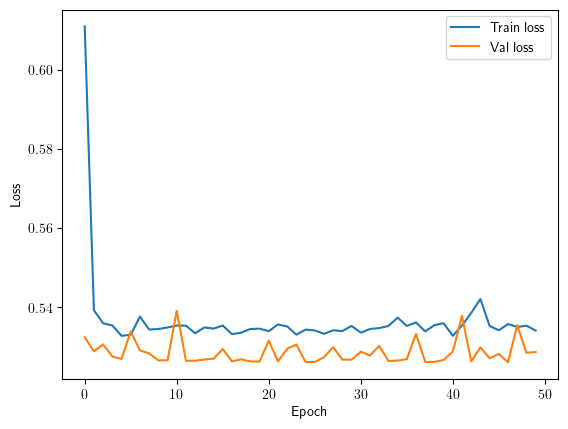

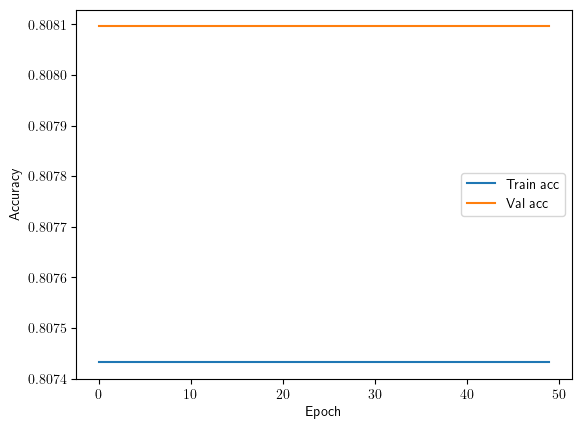

In [3]:

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'loss_eps{epsilon}_epk{epochs}.png', dpi=450)
plt.show()

plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f'acc_eps{epsilon}_epk{epochs}.png', dpi=450)
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


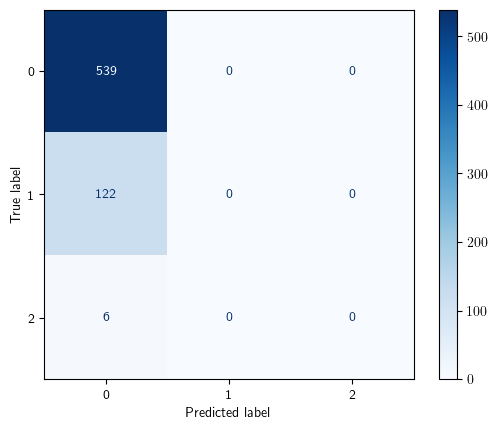

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_val_pred = model.predict(X_test).argmax(axis=1)  # for softmax output
cm = confusion_matrix(y_test, y_val_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()
